# Wstęp do Sztucznej Inteligencji - rok akademicki 2017/2018

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`. Możesz również sprawdzić czy twoje rozwiązania przechodzą wstępną walidację (Validate). 

## Temat: Algorytmy genetyczne - Lab 4 - Problem plecakowy
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

### Problem plecakowy
Problem plecakowy to problem optymalizacji dyskretnej. W swojej najprostszej wersji może być sformułowany następująco.

Spośród `N` dostępnych przedmiotów możmy zabrać taką ich liczbę by suma ich wag nie przekraczała pewnej dopuszczalnej wartości (maksymalne obciążenie plecaka). Każdy przedmiot, oprócz wagi, ma przypisaną swoją wartość. 

Które przedmioty zbrać, aby ich sumaryczna wartość była jak największa, ale ich sumaryczna waga nie przekraczała dopuszczalnej maksymalnej wagi plecaka?

Mamy zatem do czynienia z problemem optymalizacji z ograniczeniami.

Przeczytaj więcej o problemie plecakowym:

https://pl.wikipedia.org/wiki/Problem_plecakowy

### Prosty generator problemu plecakowego (0-1 knapsack problem)

Generujemy listę przedmiotów, z losowymi wagami oraz wartościami z podanych przedziałów.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#wmin - minimalna waga przedmiotu
#wmax - maksymalna waga przedmiotu
#vmin - minimalna wartość przedmiotu
#vmax - maksymalna wartość przedmiotu
#items_num - liczba dostępnych przedmiotów
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

Przykładowy problem plecakowy (zwróć uwagę, że możemy zagwarantować generowanie za każdym razem tego samego problemu poprzez ustawienie ziarna generatora liczb losowych).

In [2]:
num = 50  # liczba przedmiotów
wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.5  # pojemnosc plecaka jako procent sumy wag wszystkich przedmiotow

# ustawienie ziarna
np.random.seed(1111)

w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # pojemnosc plecaka

print('Problem plecakowy:')
print('pojemnosc plecaka:', W)
print('wagi:',w, 'suma:', Wall)
print('wartosci:',v, 'suma:', Vall)

Problem plecakowy:
pojemnosc plecaka: 1140
wagi: [29 56 82 13 35 53 25 23 21 12 15  9 13 87  9 63 62 52 43 77 95 79 77  5 78
 41 10 10 88 19  1 37  9 70 22 82 46 51 97 46 12 32 56 30 86 45 99 89  1 88] suma: 2280
wartosci: [94 48 26 65 53 54 76 48 98 63 67 74 40 41 76  8 10 78 18 79 92 23  3 64 22
 43 24 75  8 36 78  6 98 33 49 31 15 21 30 44 14 75 55 22 71 95 94  9 68 65] suma: 2479


## Zadanie 1 (2 pkt.) - rozwiązanie metodą brute force

Mamy problem plecakowy ze 100 przdmiotami. Chcemy sprawdzić każde możliwe rozwiązanie. Jeśli w ciągu sekundy moglibysmy sprawdzić miliard rozwiązań, to ile lat by to trwało? Przyjmij, że rok ma 365 dni.

Otrzymaną liczbę lat przypisz do zmiennej o nazwie `liczba_lat`. Wynik zaokrąglij do pełnych lat w dół.

In [3]:
# YOUR CODE HERE
liczba_lat_f = (2**100)/1000000000/60/60/24/365
liczba_lat = int(liczba_lat_f)
print('Sprawdzanie zajmie: {} lat'.format(liczba_lat))

Sprawdzanie zajmie: 40196936841331 lat


In [4]:
#Komórka z autotestem

## Kodowanie rozwiązania

Potencjalne rozwiązanie problemu plecakowego mozna zakodować jako wektor 0/1, gdzie 1 oznacza wybranie przedmiotu do plecaka.

Warto skorzystać z kodowania True/False i macierzy numpy, gdyż ułatwi to obliczenie (macierze True/False mogą służyć do indeksowania innych macierzy).

Przykładowo:

In [5]:
num = w.shape[0]
sol = np.random.randint(0,2, size=num, dtype=np.bool)  # True oznacza, ze przedmiot jest wybrany

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
  True  True False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 24 25 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1212
Suma wartosci: 1046


## Rozwiązania dopuszczalne i niedopuszczalne - procedura naprawcza

Jeśli suma wag przekracza pojemność plecaka, to rozwiązanie jest rozwiązaniem niedopuszczalnym i jest całkowicie nieprzydatne.

Rozwiązanie niedopuszczalne można poddać procedurze naprawczej. Przykładowo, poniższa funkcja usuwa przedmioty z plecaka, dopóki nie powstanie rozwiązanie dopuszczalne.

In [6]:
# Usuwa losowe przedmioty, aż rozwiązanie stanie się dopuszczalne
# Jesli rowziazanie jest dopuszczlane, nie zostanie zmienione
def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx%num] == False:
            indx = indx + 1
        sol[indx%num] = False

#### Przykładowa naprawa:

In [7]:
correct_solution(w, v, W, sol)

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
 False False False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1093
Suma wartosci: 981


## Losowe, dopuszczalne rozwiązania

Bazując na powyższej procedurze, można zdefiniować funkcję generującą losowe, ale zawsze dopuszczalne rozwiązania.

In [8]:
def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=np.bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

#### Przykład użycia:

In [9]:
sol = get_random_solution(w,v,W)

print('Rozwiązanie:', sol[0])
print('Lista wybranych przedmiotow:', np.arange(num)[sol[0]])
print('Suma wag:', sol[1])
print('Suma wartosci:', sol[2])

Rozwiązanie: [ True False  True False False False False  True  True  True  True False
  True  True  True False False  True  True  True False False False False
  True  True False  True False  True  True  True False  True  True False
 False False False False  True False  True  True False False  True  True
 False  True]
Lista wybranych przedmiotow: [ 0  2  7  8  9 10 12 13 14 17 18 19 24 25 27 29 30 31 33 34 40 42 43 46 47
 49]
Suma wag: 1115
Suma wartosci: 1329


## Random search

Powyższe funkcje można przełożyć na prostą heurystykę przeszukiwania losowego. Generujemy losowe (ale dopuszczalne) rozwiązania przez zadaną liczbę iteracji i zapamiętujemy najlepsze. Dodatkowo, zapisujemy oceny rozwiązań (wartość wszystkich przedmiotów w plecaku) by przedstawić je na wykresie.

In [10]:
def search_random(w,v,W,iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

#### Przykładowe uruchomienie:

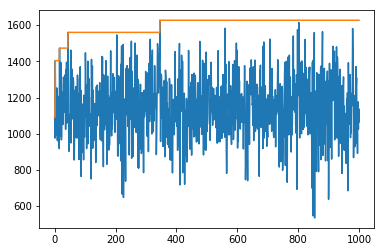

Najlepsze rozwiązanie: [ True False False False False  True  True  True  True  True  True  True
  True False False  True  True  True  True  True False False  True  True
 False  True False  True False  True  True  True  True False False False
 False False  True  True  True  True False False False  True  True False
 False  True]
Przedmioty: [ 0  5  6  7  8  9 10 11 12 15 16 17 18 19 22 23 25 27 29 30 31 32 38 39 40
 41 45 46 49]
Suma wag: 1115
Suma wartosci: 1627


In [11]:
sol_random_search = search_random(w, v, W, 1000)

print('Najlepsze rozwiązanie:',sol_random_search[0])
print('Przedmioty:',np.arange(num)[sol_random_search[0]])
print('Suma wag:', sol_random_search[1])
print('Suma wartosci:', sol_random_search[2])

## Greedy search - procedura optymalizacji zachłannej

Problemem w powyższym podejściu jest fakt, że kolejne rozwiązania nie korzystają z uzyskanej już wiedzy o najlepszych do tej pory rozwiązaniach. Zatem inna prosta heurytyka polega na wystartowaniu z losowego rozwiązania, a następnie modyfikowaniu go poprzez losowe dodawanie przedmiotu do plecaka. Jeśli zmiana (po ewentualnej naprawie) wprowadza poprawę, pozostajemy przy takim rozwiązaniu, jeśli następuje pogorszenie, odrzucamy takie rozwiązanie i ponawiamy próbę.

Taka procedura jest przykładem optymalizacji zachłannej.

In [12]:
def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best 

#### Przykładowe uruchomienie:

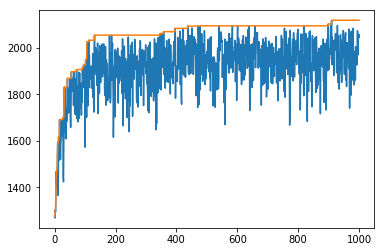

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True  True False False  True
 False False  True  True False  True  True False  True False  True False
 False False False  True  True  True False  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 17 19 20 23 26 27 29 30 32 34 39
 40 41 43 44 45 46 48 49]
Suma wag: 1139
Suma wartosci: 2118


In [13]:
plt.figure()
sol_greedy = search_greedy_improvement(w,v,W,1000)

print('Najlepsze rozwiązanie:',sol_greedy[0])
print('Przedmioty:',np.arange(num)[sol_greedy[0]])
print('Suma wag:', sol_greedy[1])
print('Suma wartosci:', sol_greedy[2])

## Dwie inne proste heurystyki

### Najpierw najbardziej wartościowe

Jak dobre rozwiązanie dostaniemy, jeśli do plecaka pakować będziemy najpierw najbardziej wartościowe przedmioty (o ile się zmieszczą)? Pomysł ten jest zaimplementowany w poniższej funkcji.


In [14]:
#Pakuje najpierw najbardziej wartościowe przedmioty
def get_value_first(w, v, W):
    ii = np.argsort(-v)
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

#### Przykładowe uruchomienie:

In [15]:
sol_value_first = get_value_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_value_first[0])
print('Przedmioty:',np.arange(num)[sol_value_first[0]])
print('Suma wag:', sol_value_first[1])
print('Suma wartosci:', sol_value_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True False  True  True  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34 39
 41 42 43 44 45 46 48 49]
Suma wag: 1137
Suma wartosci: 2161


### Najpierw te o najlepszym stosunku wartości do wagi

Inny pomysł to pakowanie najpierw przedmiotów o najlepszym stosunku wartości do wagi.


In [16]:
def get_ratio_first(w, v, W):
    ii = np.argsort(-v/w) #stosunek wartosci do wagi
    print(v/w,ii)
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

#### Przykładowe uruchomienie:

In [17]:
sol_ratio_first = get_ratio_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_ratio_first[0])
print('Przedmioty:',np.arange(num)[sol_ratio_first[0]])
print('Suma wag:', sol_ratio_first[1])
print('Suma wartosci:', sol_ratio_first[2])

[  3.24137931e+00   8.57142857e-01   3.17073171e-01   5.00000000e+00
   1.51428571e+00   1.01886792e+00   3.04000000e+00   2.08695652e+00
   4.66666667e+00   5.25000000e+00   4.46666667e+00   8.22222222e+00
   3.07692308e+00   4.71264368e-01   8.44444444e+00   1.26984127e-01
   1.61290323e-01   1.50000000e+00   4.18604651e-01   1.02597403e+00
   9.68421053e-01   2.91139241e-01   3.89610390e-02   1.28000000e+01
   2.82051282e-01   1.04878049e+00   2.40000000e+00   7.50000000e+00
   9.09090909e-02   1.89473684e+00   7.80000000e+01   1.62162162e-01
   1.08888889e+01   4.71428571e-01   2.22727273e+00   3.78048780e-01
   3.26086957e-01   4.11764706e-01   3.09278351e-01   9.56521739e-01
   1.16666667e+00   2.34375000e+00   9.82142857e-01   7.33333333e-01
   8.25581395e-01   2.11111111e+00   9.49494949e-01   1.01123596e-01
   6.80000000e+01   7.38636364e-01] [30 48 23 32 14 11 27  9  3  8 10  0 12  6 26 41 34 45  7 29  4 17 40 25 19
  5 42 20 39 46  1 44 49 43 33 13 18 37 35 36  2 38 21 24 31

## Zadanie 2 (6 pkt.)

Opracowane być mogą inne procedury naprawcze. Przykładowo, dla rozwiązania niedopuszczalengo, zamiast zmieniać losowe bity True na False, jak w funkcji `correct_solution`, można usuwać najpierw te przedmioty, które mają najgorszy stosunek wartości do wagi. Zaimplementuj taką procedurę. 

Porównaj jej działanie z funkcją `correct_solution` w metodach RandomSearch oraz GreedySearch. Przedstaw uśrednione wyniki (co najmniej 10 uruchomień) i wnioski.

In [19]:
import numpy as np

num = 50
weight_min = 1
weight_max = 100
value_min = 1
value_max = 100
knapsack_perc = 0.5


def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  # weight
    v = np.random.randint(vmin, vmax, size=items_num)  # values
    return w, v


def poprawne_rozwiazanie(w, v, W, sol):
    st = np.argsort(v / w)
    i = 0
    while w[sol].sum() > W:
        index = st[i]
        sol[index] = False
        i = i + 1


def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx % num] == False:
            indx = indx + 1
        sol[indx % num] = False


def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0, 2, size=num, dtype=np.bool)
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w, v, W, sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V


def get_random_solution2(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0, 2, size=num, dtype=np.bool)
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution2(w, v, W, sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V


def search_random(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w, v, W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best

    return sol, _W, _V


def search_random2(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution2(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution2(w, v, W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best


def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        # set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx % num] == True:
            indx = indx + 1
        sol[indx % num] = True
        # correct if needed
        if w[sol].sum() > W:
            correct_solution(w, v, W, sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best


def search_greedy_improvement2(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution2(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        # set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx % num] == True:
            indx = indx + 1
        sol[indx % num] = True
        # correct if needed
        if w[sol].sum() > W:
            correct_solution2(w, v, W, sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best


##testy
n_iter = 10
import time

np.random.seed(121023)
w, v = generate_problem(weight_min, weight_max, value_min, value_max, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall)  # pojemnosc plecaka
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=np.bool)
print("Poj max: ", W)

#  correct
poprawione_v = 0
poprawione_v_2 = 0
# poprawne_rozwiazanie
poprawione_w = 0
poprawione_w_2 = 0
# random
poprawione_vr = []
poprawione_vr_2 = []
poprawione_wr = []
poprawione_wr_2 = []
# greedy
poprawione_vg = []
poprawione_vg_2 = []
poprawione_wg = []
poprawione_wg_2 = []


def test_corrector(w_2, v_2, W_2, fun):

    rozwiazanie_search = fun(w_2, v_2, W_2, 500)
    poprawione_w = rozwiazanie_search[1]
    poprawione_v = rozwiazanie_search[2]
    return poprawione_v, poprawione_w


def test_runner(result_value, result_weight, calc_result):
    result_v, result_w = calc_result
    result_value.append(result_v)
    result_weight.append(result_w)


for i in range(n_iter):
    w_2 = np.copy(w)
    v_2 = np.copy(v)
    sol_2 = np.copy(sol)

    correct_solution(w_2, v_2, np.copy(W), sol_2)
    poprawione_v += v_2[sol_2].sum()
    poprawione_w += w_2[sol_2].sum()

    w_2 = np.copy(w)
    v_2 = np.copy(v)
    sol_2 = np.copy(sol)

    correct_solution2(w_2, v_2, np.copy(W), sol_2)
    poprawione_v_2 += v_2[sol_2].sum()
    poprawione_w_2 += w_2[sol_2].sum()

    test_runner(poprawione_vr, poprawione_wr, test_corrector(np.copy(w), np.copy(v), np.copy(W), search_random))

    test_runner(poprawione_vr_2, poprawione_wr_2, test_corrector(np.copy(w), np.copy(v), np.copy(W), search_random2))

    test_runner(poprawione_vg, poprawione_wg,
                test_corrector(np.copy(w), np.copy(v), np.copy(W), search_greedy_improvement))

    test_runner(poprawione_vg_2, poprawione_wg_2,
                test_corrector(np.copy(w), np.copy(v), np.copy(W), search_greedy_improvement2))

print("Sr wyniki poprawień:")

print("correct_solution/4")
print("Poprawione w: ", poprawione_w / n_iter)
print("Poprawione v: ", poprawione_v / n_iter)

print("correct_solution2/4 ")
print("Poprawione w: ", poprawione_w_2 / n_iter)
print("Poprawione v: ", poprawione_v_2 / n_iter)

print("search_random/4")
print("Poprawione w: ", np.mean(poprawione_wr))
print("Poprawione v: ", np.mean(poprawione_vr))

print("search_random2/4")
print("Poprawione w: ", np.mean(poprawione_wr_2))
print("Poprawione v: ", np.mean(poprawione_vr_2 ))

print("search_greedy_improvement/4")
print("Poprawione w: ", np.mean(poprawione_wg_2 ))
print("Poprawione v: ", np.mean(poprawione_vg_2 ))

print("search_greedy_improvement2/4")
print("Poprawione w: ", np.mean(poprawione_wr_2 ))
print("Poprawione v: ", np.mean(poprawione_vr_2 ))


Poj max:  1179


NameError: name 'correct_solution2' is not defined

Twoje wyniki i wnioski umieść w komórce poniżej.

### Wyniki
```
Pojemnosc maxymalna:  1179
Srednie wyniki poprawień:
Dla correct_solution/4
Poprawione w:  1137.2
Poprawione v:  1100.9
Dla correct_solution2/4 
Poprawione w:  1166.0
Poprawione v:  1397.0
Dla search_random/4
Poprawione w:  1140.8
Poprawione v:  1655.5
Dla search_random2/4
Poprawione w:  1147.6
Poprawione v:  1808.0
Dla search_greedy_improvement/4
Poprawione w:  1163.5
Poprawione v:  2077.6
Dla search_greedy_improvement2/4
Poprawione w:  1147.6
Poprawione v:  1808.0
```

Najlepszy wynik uzyskał greedy 1, random1 random2 i greedy 2 uzyskały 
podobne wyniki. Zwykłe poprawianie wyniku uzyskało najgorsze wyniki.

In [ ]:
#Komórka z autotestem

## Zadanie 3 (12 pkt.)

Dostosuj swoją implementację algorytmu genetycznego do problemu plecakowego. 

- Jakie wyniki można uzyskać z jego pomocą? Czy działa on zawsze lepiej niż inne heurystyki?

- Która procedura naprawcza działa lepiej w algorytmie genetycznym?

- Przedstaw wnioski na podstawie uśrednionych wyników dla problemów plecakowych o rozmiarze 50, 100, 300.

- Problemy plecakowe i najlepsze znalezione rozwiązania zapisz do plików.

UWAGA! Po wygenerowaniu problemu plecakowego, przed uruchomieniem algorytmu genetycznego (lub innego) wywołaj:

`np.random.seed(int(time.time()))`

tak by problem plecakowy generował się ten sam, ale algorytmy miały szansę na nowy przebieg.

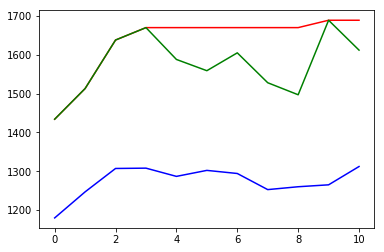

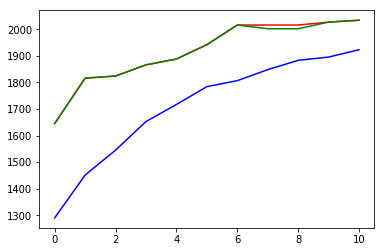

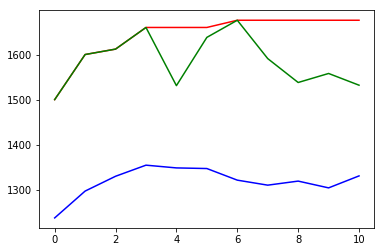

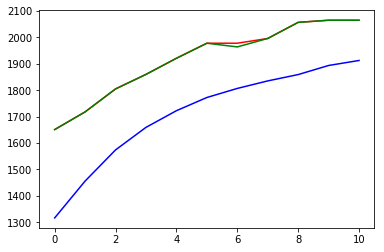

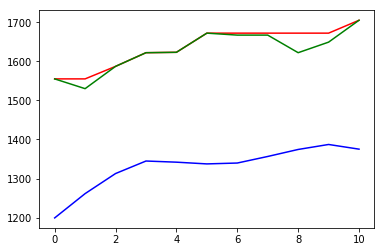

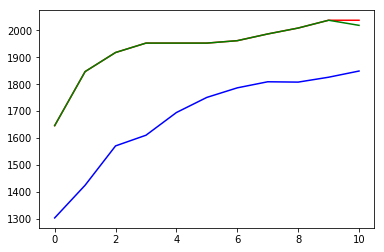

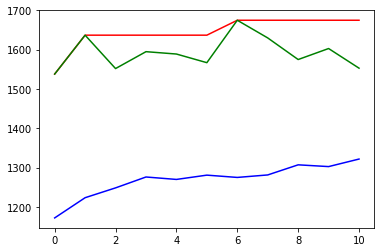

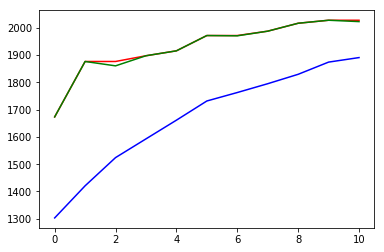

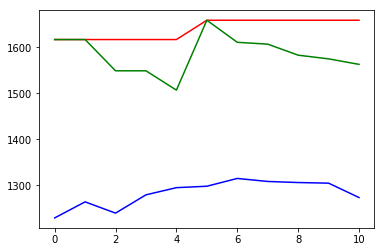

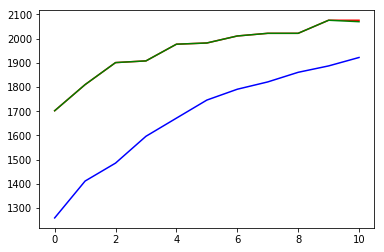

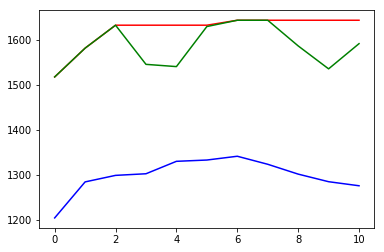

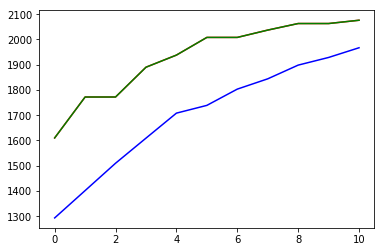

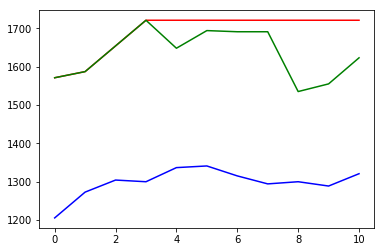

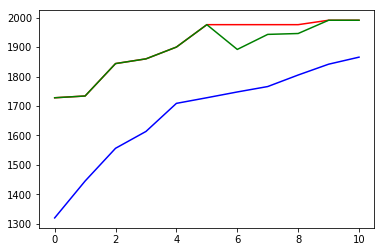

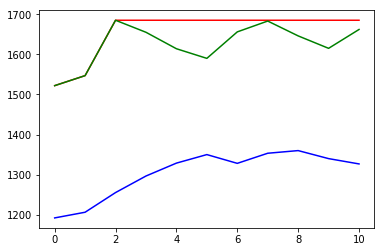

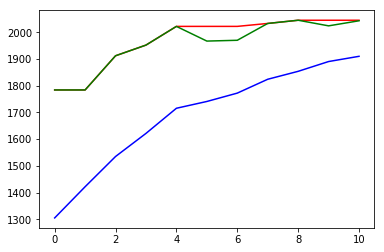

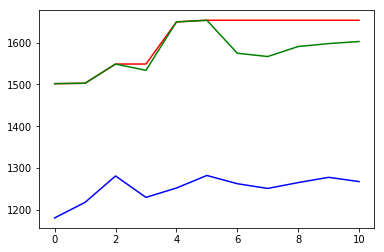

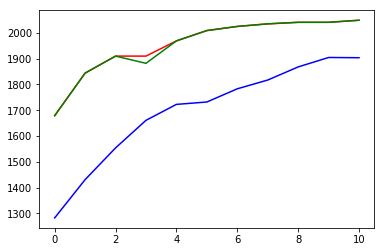

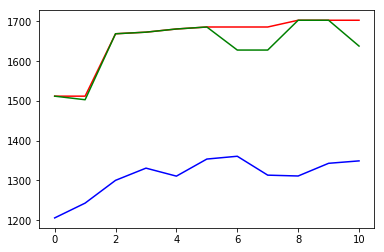

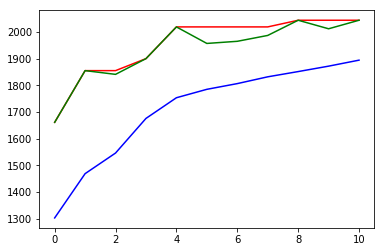

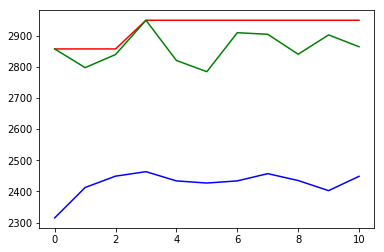

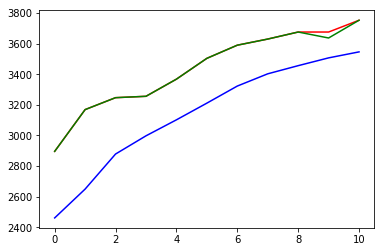

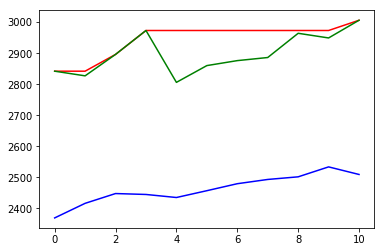

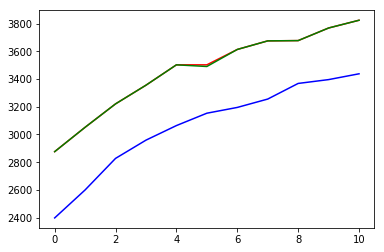

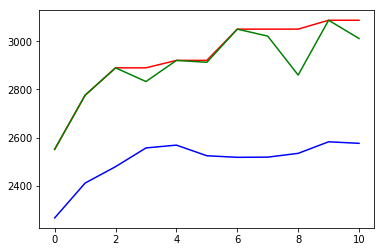

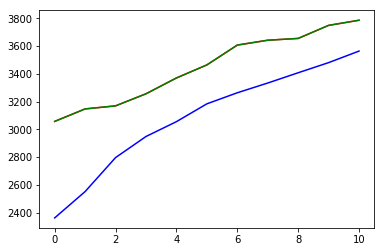

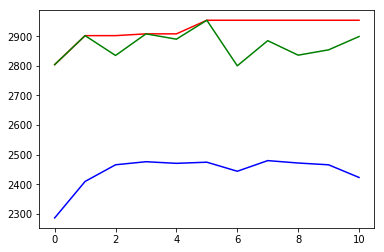

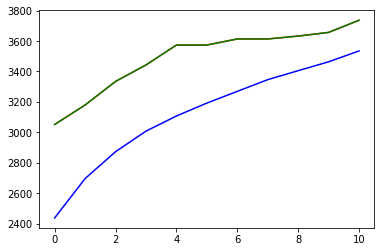

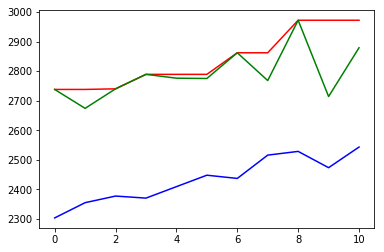

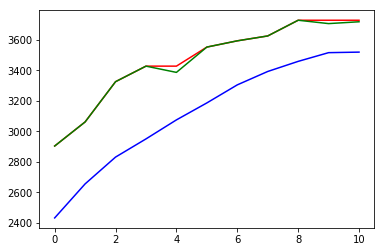

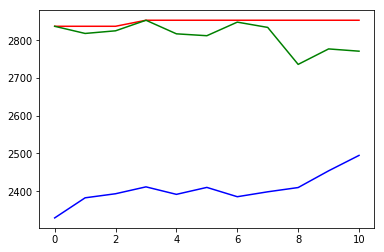

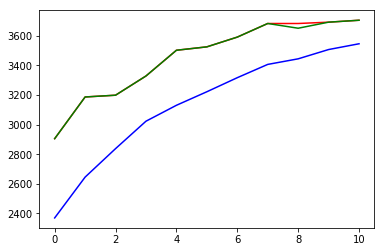

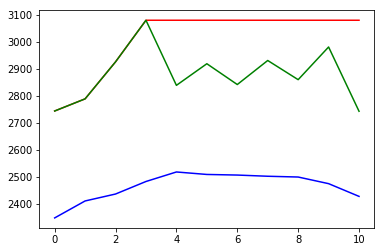

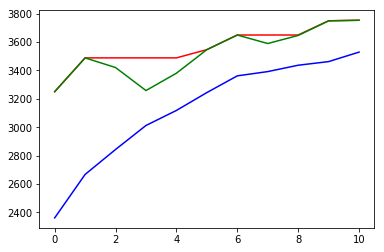

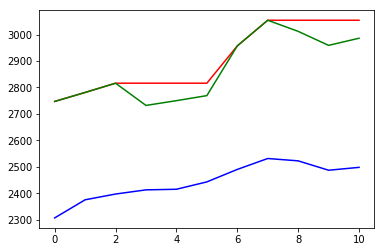

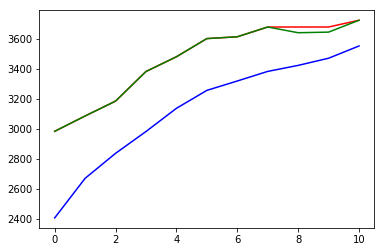

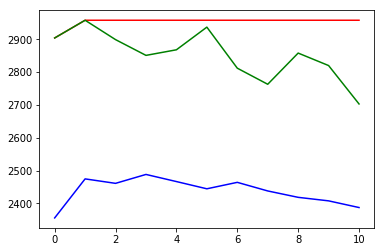

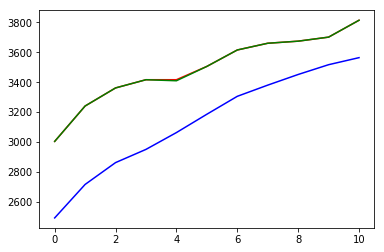

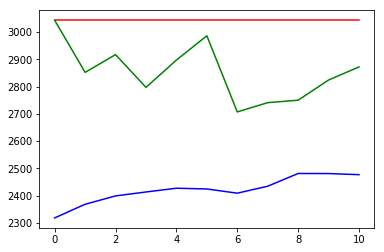

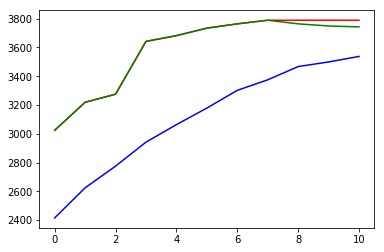

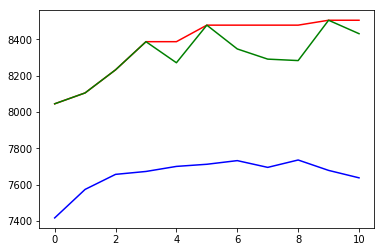

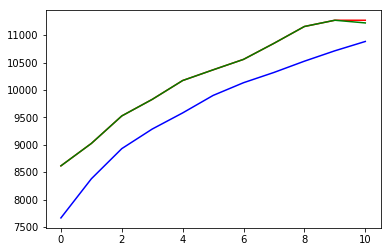

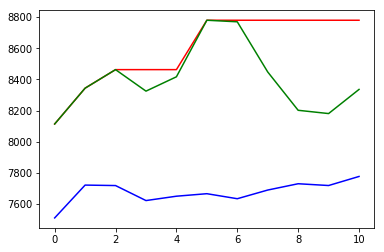

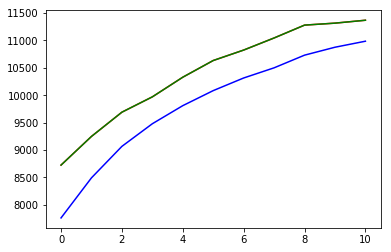

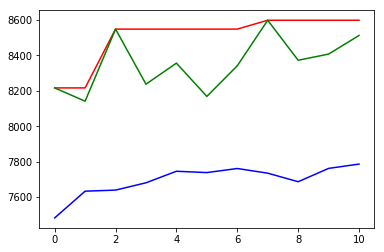

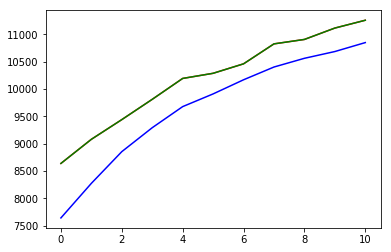

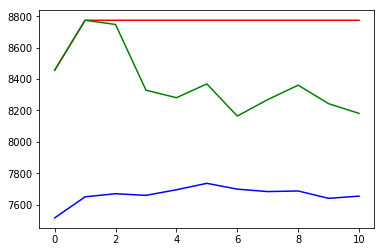

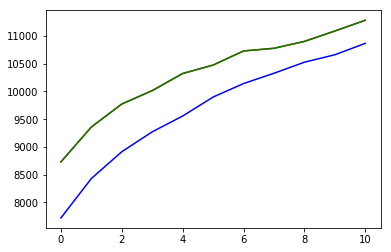

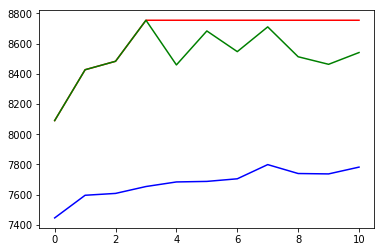

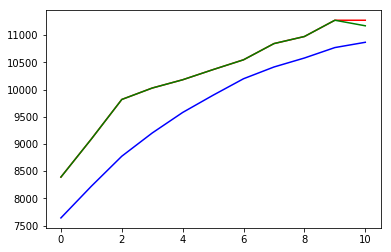

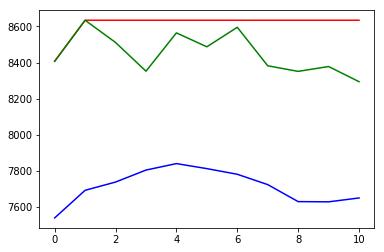

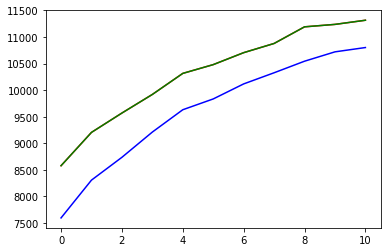

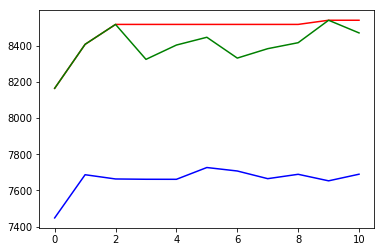

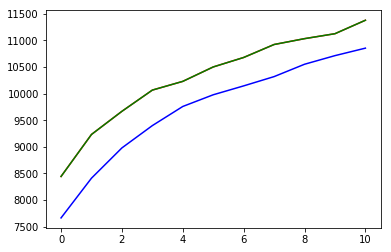

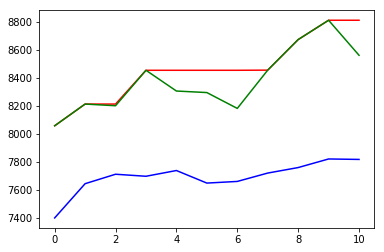

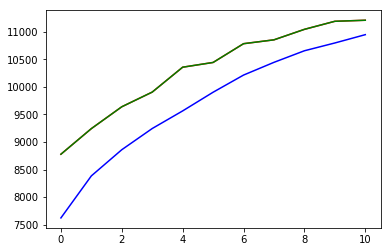

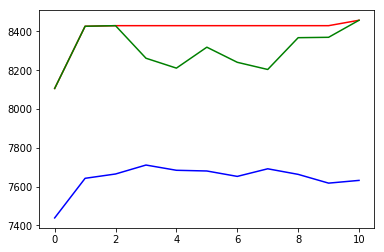

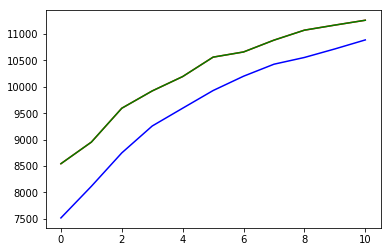

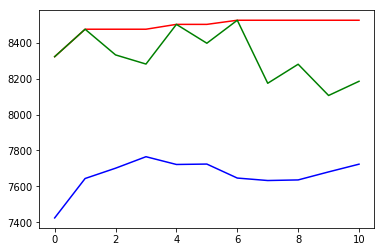

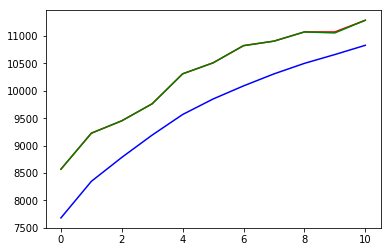

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time


#%matplotlib notebook

def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  # weight
    v = np.random.randint(vmin, vmax, size=items_num)  # values
    return w, v


def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx % num] == False:
            indx = indx + 1
        sol[indx % num] = False


def gen_pop(w, v, W, pop_size, corrector):
    num = w.shape[0]
    pop = np.random.randint(2, size=(pop_size, num), dtype=np.bool)
    for i in pop:
        corrector(w, v, W, i)
    return pop


def evaluate(pop, v):
    evaluated_pop = np.ndarray(int(pop.size / v.shape[0]))
    for i in range(0, int(pop.size / v.shape[0]), 1):
        evaluated_pop[i] = v[pop[i]].sum()
    return evaluated_pop


def select(pop, evals):
    x, y = pop.shape
    new_pop = np.ndarray(shape=(x, y), dtype='bool')
    min_elem = evals.min()
    if (min_elem <= 0):
        evals = evals + np.abs(min_elem)
    cumulative_sum = np.cumsum(evals)
    max_elem = cumulative_sum.max()
    for i in range(0, x):
        probability = np.random.uniform(0, max_elem)
        for j in range(0, x - 1):
            if probability > cumulative_sum[j] and probability <= cumulative_sum[j + 1]:
                new_pop[i] = pop[j + 1]
                break
        else:
            new_pop[i] = pop[0]

    return new_pop


def xover(pop, p, w, v, W, corrector):  # p - prawdopodobienstwo krzyzowania
    x, y = pop.shape
    new_pop = np.ndarray(shape=(x, y), dtype='bool')
    for i in range(0, x, 2):
        if i == x - 1:
            new_pop[i] = pop[i]
        else:
            probability = np.random.random()
            if probability < p:
                cr = np.random.randint(0, y)
                for j in range(0, y):
                    if j >= cr:
                        new_pop[i][j] = pop[i + 1][j]
                        new_pop[i + 1][j] = pop[i][j]
                    else:
                        new_pop[i][j] = pop[i][j]
                        new_pop[i + 1][j] = pop[i + 1][j]
                corrector(w, v, W, new_pop[i])
                corrector(w, v, W, new_pop[i + 1])
            else:
                new_pop[i] = pop[i]
                new_pop[i + 1] = pop[i + 1]

    return new_pop


def mutate(pop, p, w, v, W, corrector):  # p - prawdopodobienstwo mutacji
    x, y = pop.shape
    new_pop = np.ndarray(shape=(x, y), dtype='bool')
    for i in range(0, x):
        for j in range(0, y):
            probability = np.random.random()
            if probability < p:
                if pop[i][j] is True:
                    new_pop[i][j] = False
                else:
                    new_pop[i][j] = True
            else:
                new_pop[i][j] = pop[i][j]
        corrector(w, v, W, new_pop[i])
    return new_pop


def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations, corrector):
    pop = gen_pop(w, v, W, pop_size, corrector)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]

    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w, v, W, corrector)
        pop = mutate(pop, pmutate, w, v, W, corrector)
        evals = evaluate(pop, v)
        ii = np.argmax(evals)
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i + 1
            best = pop[ii].copy()
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))

    plt.plot(v_best, 'r')
    plt.plot(v_all, 'g')
    plt.plot(v_mean, 'b')
    plt.show()
    return best, w[best].sum(), best_V


def correct_solution2(w, v, W, sol):
    st = np.argsort(v / w)
    i = 0
    while w[sol].sum() > W:
        index = st[i]
        sol[index] = False
        i = i + 1


# num = 50  # liczba przedmiotów
wmin = 1
wmax = 100
vmin = 1
vmax = 100
knapsack_perc = 0.5

pop_size = 50
generations = 10
pxover = 0.2
pmutate = 0.1

np.random.seed(121023)
f = open("result.dat", "w")
for num in (50, 100, 300):
    w, v = generate_problem(wmin, wmax, vmin, vmax, num)
    Wall = w.sum()
    W = int(knapsack_perc * Wall)
    f.write("Wygenerowany problem plecakowy dla " + str(num) + " przedmiotow 'n")
    f.write("Wagi przedmiotow:" + str(w))
    f.write("\nWartosci przedmiotow:" + str(v))
    f.write("\nPojemnosc plecaka:" + str(W))

    wagi = []
    wartosci = []
    wagi2 = []
    wartosci2 = []
    for i in range(10):
        np.random.seed(121023 + i)
        _x, y, z = evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations, correct_solution)
        wagi.append(y)
        wartosci.append(z)
        _x, y2, z2 = evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations, correct_solution2)
        wagi2.append(y2)
        wartosci2.append(z2)

    f.write("Podsumowanie problemu:\n")

    f.write("Srednia waga plecaka z correct: " + str( np.mean(wagi)) )
    f.write("\n")
    f.write("Srednia wartosc plecaka z correct: "+ str( np.mean(wartosci)))
    f.write("\n")
    f.write("Srednia waga plecaka z correct2: " + str( np.mean(wagi2)))
    f.write("\n")
    f.write("Srednia wartosc plecaka z correct2: "+ str( np.mean(wartosci2)))

f.close()


Twoje wyniki i wnioski umieść w komórce poniżej.

Wygenerowany problem plecakowy dla  50  przedmiotow


Wagi przedmiotow: [49 69 17 48 75 54  7 99 39 71 72 64 80 45 80 23 23  6 96 41  1 64 92 26 61
 67 10 96 30 20 54 26 57 24 98 18  3 17 81 13 66 65  4 60 48 19 77  3 96  4]

Wartosci przedmiotow: [90 14 27 62  8 96 20 71 71 56 84 48 67 30 97 66 40 32 34 63 92 26  2 29 96
  2 67 42 22 92 86 16 61 84 98 32 14 49 59 57 39  8 70 49 72 90 70  8 42 45]

Pojemnosc plecaka: 1179
Figure 1
Podsumowanie problemu:


Srednia waga plecaka z correct:  1160.9


Srednia wartosc plecaka z correct:  1681.1


Srednia waga plecaka z correct2:  1152.8


Srednia wartosc plecaka z correct2:  2044.5




Wygenerowany problem plecakowy dla  100  przedmiotow


Wagi przedmiotow: [33 32 59 62 32 71  6 27 45 15 71 63  2 41 64 15 74 52 53 30 12 14 70 71 19
 34 62 46 46 15 72 63 43 68 62 95 65  1  4 50 20 67 46 83 33 92 22  2 16 80
 68 47 35 55 65 39 56 93 58 90  6 31 44 81  3  7 81 33 85 66 97 68 72 39 34
 39 35 78 90 81 39 81 56  5 85  3 45 61  4  6 52 24 33 27 96 45 88 96 26 76]

Wartosci przedmiotow: [91 26 22 73 86 39 78 19 98 94 21 27 28 51 23 15 64  4 58 95  3 83 74 89 13
 74 55 67  2 18 92  8 34 71 61 81 59  6 14  6 62  7  1 36 70 41 25 59  2 28
 68 96 77 17  9 58 31 35 53 49 86 18 77 98 53 15 89 50 73 98 51  1 94 94 72
  5 37 79 53 28 49 46 11 52 45 16  7 13 49 65 14 80 20 56 66 54 64 71 74 93]

Pojemnosc plecaka: 2422
Podsumowanie problemu:


Srednia waga plecaka z correct:  2396.2


Srednia wartosc plecaka z correct:  2995.7


Srednia waga plecaka z correct2:  2393.6


Srednia wartosc plecaka z correct2:  3761.3




Wygenerowany problem plecakowy dla  300  przedmiotow


Wagi przedmiotow: [59 73 93 66 71 28 23 28 40 42 17 84 26 37 30 72 17 16 11 29 19 73 35 53 39
 81 50 59 79 84 36 58 46 52  1 16 34 51 84 46 54 41 97 66 79 93 56 69 66 21
 54 47 96 66 65 50 46 90 27 24 78 24 51 80 68  2 44 88 98 92 30 92 88 24 37
 38 66  3 49 47 79 31 19 60 58 17 79 43 31 72 87 88 10 57 44 44  2 67 16 95
 29 90 67 82 80 29 74 12 77 34 84 41 97 37 79 26 95 72 70 26 48 56 75 39 50
 15  3 75 32  5 96 68 37 42 46 95 33 60 15 63 72 57 36 20 85 77 68 83 53 94
 22 51 62 14 80 46 65 19 90 64 33 99 64 19 28 79 11 68 84 24 50 64 78 40 51
 67 64 54 64 94 35 64 92 76  1 19 32 97 35  2 30 44 53 30 38 54 82 38 22 93
 69 14 78 54 79 31 69  8 66  9 57 87 74 57 14 79 25  2 42 78 94 98 40 91 21
 88 88 35 40 79 66 68 83 75 87  8 39 75 23 57 25 75 32 15 18 29 27 17 13 98
 43 49 61 85 38 78 43 17  4 38 28 22 82 87 37 53 31 30 90 52 62 69 77 18 31
 38 57 44 29 89 97 81 53 87 30 57 32 45 30 25 69 78 66 25 74 69 72 46 88 50]

Wartosci przedmiotow: [35 99 38 32 29  6  1 54 25 66 15 18 73 21 57 45 42 59 49 52 83 28 15 33 75
  8 69 64 40 84 29 36  6 68 15 81 30 60 80 11 25 47 90 94 78 70 52 87 81 17
 36 52 21 75 39 46  3 15 63  9 23 55 89 89 94 50 64 31 15 38 68 98 72 20 79
 82 76 32 95 37 91 20 44 36 41 10 97 18 39 18 31 35 18 82 77 29 20 99 24 70
 33 52 62 49 26 53 59 84 56 46 84 20 19 73 36 25  1 60 62 78 75 88 45 89  7
 52 31 91 21 26 26 29 91 72 98 10 72 36 22 84 60 40 29 99 68 52 65 81 35 42
 27 74 59 67  4 75 54 20 90 18  9 28 46  7 77  2 54 19 87 58 51 43 42 61 78
 84 49 82 75 50 44 25 39 96 61 25 28 26 99 82 76 79 12 28 22 19 30 94 84 73
 70 79 17 41 90 57 71 54 85 48 27 43 85 59 31  7 27 19 44 38 96 92 97 98 73
 75 10 22 29 41 26 73 48  2 67 72 41 55 54 31 56 28 61 66 27  9 99 97 41 82
 98 34 81 81 94 28 22 40 11 23 96 86  4 75 66 85 52 75 63 55 53 89 14 42 97
 63 75 44  9 53 38 18 29 19 98 50 67 66 34 44 35 22 86 64 88 56  6 18 86 66]

Pojemnosc plecaka: 7899
Podsumowanie problemu:


Srednia waga plecaka z correct:  7862.8


Srednia wartosc plecaka z correct:  8638.1


Srednia waga plecaka z correct2:  7874.0


Srednia wartosc plecaka z correct2:  11290.2

We wszystkich testowanych przypadkach funkcja correct2 zadziałała lepiej.

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>